Machine Learning model to predict if a client will subscribe to the product, given his/her demographic and marketing campaign related information

# 1. Loading required Libraries and Dataset

In [13]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (15, 9)


import pandas as pd
import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [14]:
# Load dataset
url = "marketing-data.csv"
dataset = pd.read_csv(url)

# 2. Data Exploration

In [15]:
#Information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
is_success    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are we have 45211 observations of 17 variables (7-Numerical Variables and 10-Categorical Variables).

In [16]:
#check for any missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

Fortunatly there are no any explicit missing values for any variable.

In [17]:
# head
print(dataset.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome is_success  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no  


There are many 'unknown' values under Categorical variables.We have to treat them!!!

In [18]:
# Target variable distribution
count = dataset.groupby('is_success').size()
percent = count/len(dataset)*100
print(percent)

is_success
no     88.30152
yes    11.69848
dtype: float64


From the distribution of Target variable: "is_success" it is found that data is imbalanced because approx 88% are 'no' and 12% are 'yes'.

## Analysis of Indepedent Numerical Variables

### Note:
Analyzing each individual column and checking if there are any outlier.
Outliers can be defined as values out of range or abnormal values. 
We are using here a range based on Maximum and Minimum value for each variable selected by observing Boxplot of corresponding variable. After identification, Outlier values will be imputed by "mean" of respective variable by implementation of following "impute_outliers" function.
```
here Q1-First Quartile(25%), Q2-Second Quartile(75%), IQR-Inter Quartile Range
```

In [19]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [20]:
#The statistic of Numerical variables before Outlier treatment
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Above result shows that some columns ('balance', 'duration', 'campaign', 'pdays', 'previous') has outliers.
Same can be seen in the scatter matrix below

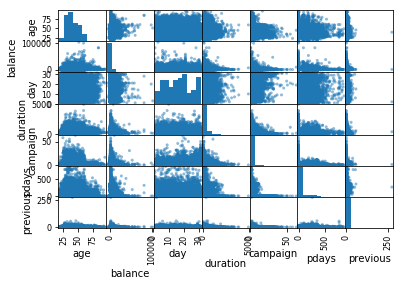

In [21]:
# scatter plot matrix, this may take a little while to execute
scatter_matrix(dataset)
plt.show()

Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).

Lets analyze all Independent Numerical variables against Target variable 'is_success' by plotting Boxplot. We can easily find outliers through Boxplot.

#### "age"

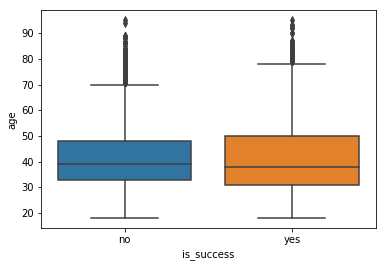

In [22]:
# age
sns.boxplot(x='is_success', y='age', data=dataset)

#### "balance"

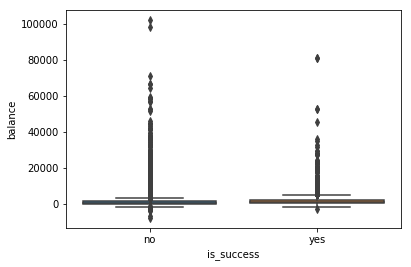

In [23]:
sns.boxplot(x='is_success', y='balance', data=dataset)

In [24]:
# Fixing balance column
dataset_new = dataset
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

#### "day"

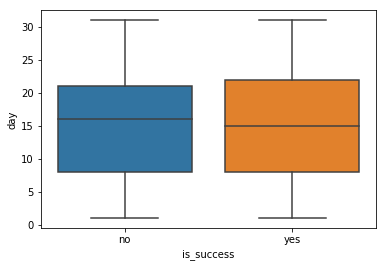

In [27]:
sns.boxplot(x='is_success', y='day', data=dataset)

#### "duration"

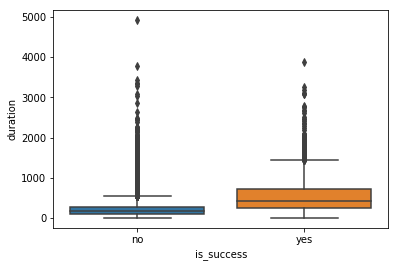

In [28]:
sns.boxplot(x='is_success', y='duration', data=dataset)

In [15]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

#### "compaign"

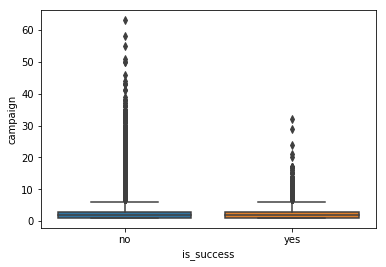

In [29]:
sns.boxplot(x='is_success', y='campaign', data=dataset)

In [29]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

#### "pdays"

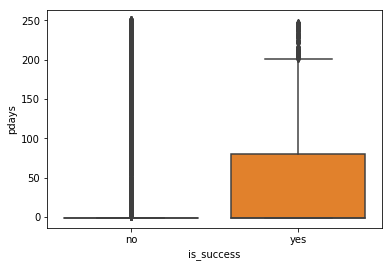

In [31]:
sns.boxplot(x='is_success', y='pdays', data=dataset)

In [32]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

#### "previous"

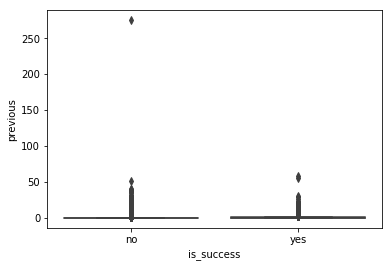

In [33]:
sns.boxplot(x='is_success', y='previous', data=dataset)

In [34]:
# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [35]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,258.163080,2.763841,17.370434,0.520972
std,10.618762,2213.867032,8.322476,257.527812,3.098021,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,4918.000000,63.000000,250.000000,15.000000


Now the data seems quite stable comparision to original.

## Analysis of Indepedent Categorical Variables

### Note: 
1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

In [36]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

#### 'job'

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


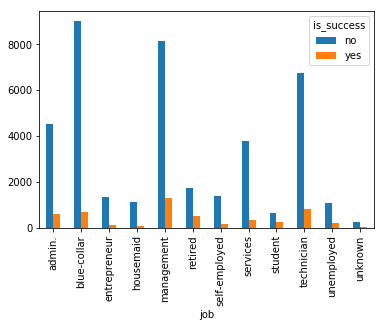

In [38]:
# job
temp1 = pd.crosstab(dataset['job'], dataset['is_success'])
temp1.plot(kind='bar')
print(dataset.groupby(['job']).size()/len(dataset)*100) 

In [39]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

#### "marital"

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


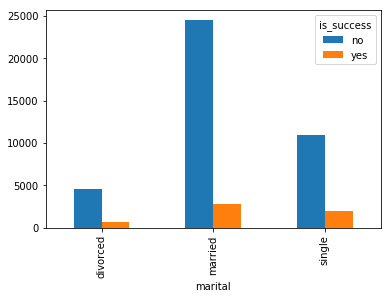

In [40]:
# marital
temp2 = pd.crosstab(dataset['marital'], dataset['is_success'])
temp2.plot(kind='bar')
print(dataset.groupby(['marital']).size()/len(dataset)*100) 

#### "education"

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


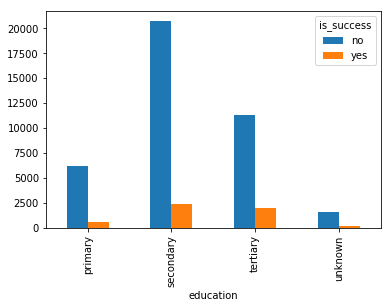

In [41]:
# education
temp3 = pd.crosstab(dataset['education'], dataset['is_success'])
temp3.plot(kind='bar')
print(dataset.groupby(['education']).size()/len(dataset)*100) 

In [42]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

#### "default"

default
no     98.197341
yes     1.802659
dtype: float64


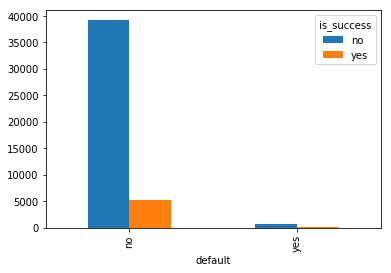

In [43]:
# default
temp4 = pd.crosstab(dataset['default'], dataset['is_success'])
temp4.plot(kind='bar')
print(dataset.groupby(['default']).size()/len(dataset)*100) 

#### This variable seems highly unbalanced (skewed) so we can drop this.

In [44]:
#dropping variable 'default'
del dataset_new['default']

#### "housing"

housing
no     44.416182
yes    55.583818
dtype: float64


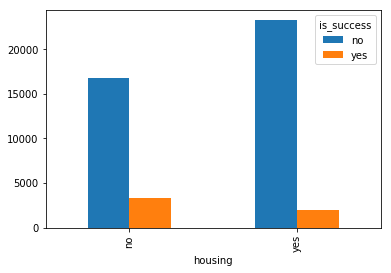

In [45]:
# housing
temp5 = pd.crosstab(dataset['housing'], dataset['is_success'])
temp5.plot(kind='bar')
print(dataset.groupby(['housing']).size()/len(dataset)*100) 

#### "contact"

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


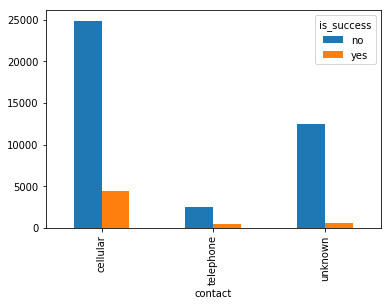

In [46]:
# "contact"
temp6 = pd.crosstab(dataset['contact'], dataset['is_success'])
temp6.plot(kind='bar')
print(dataset.groupby(['contact']).size()/len(dataset)*100) 

In [47]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

#### "month"

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


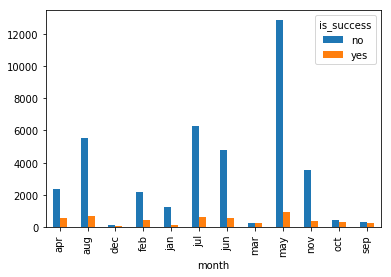

In [48]:
# "month"
temp7 = pd.crosstab(dataset['month'], dataset['is_success'])
temp7.plot(kind='bar')
print(dataset.groupby(['month']).size()/len(dataset)*100) 

#### "poutcome"

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


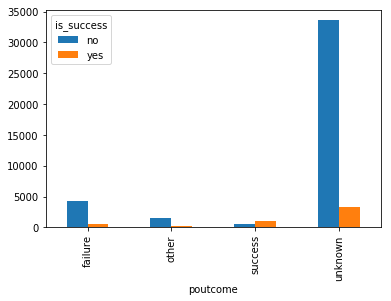

In [49]:
# "poutcome"
temp8 = pd.crosstab(dataset['poutcome'], dataset['is_success'])
temp8.plot(kind='bar')
print(dataset.groupby(['poutcome']).size()/len(dataset)*100) 

"poutcome" also have more than 81% missing values so we can drop this variable also.

In [50]:
#dropping variable 'poutcome'
del dataset_new['poutcome']

#### "loan"

loan
no     83.977351
yes    16.022649
dtype: float64


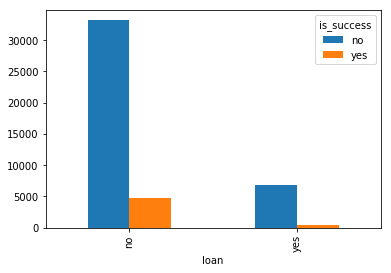

In [51]:
# "loan"
temp9 = pd.crosstab(dataset['loan'], dataset['is_success'])
temp9.plot(kind='bar')
print(dataset.groupby(['loan']).size()/len(dataset)*100) 

### Updated Dataset after Exploratary Data Analysis:

In [52]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
balance       45211 non-null float64
housing       45211 non-null object
loan          45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null float64
previous      45211 non-null float64
is_success    45211 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 4.8+ MB


Now total variables are 14 because we have removed 3 categorical variables.

# 3. Feature Engineering

In [53]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['is_success']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [54]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  balance  day  duration  campaign  pdays  job_admin.  job_blue-collar  \
0   58   2143.0    5       261         1   -1.0           0                0   
1   44     29.0    5       151         1   -1.0           0                0   
2   33      2.0    5        76         1   -1.0           0                0   
3   47   1506.0    5        92         1   -1.0           0                1   
4   33      1.0    5       198         1   -1.0           0                1   

   job_entrepreneur  job_housemaid  ...  month_dec  month_feb  month_jan  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          0   
2                 1              0  ...          0          0          0   
3                 0              0  ...          0          0          0   
4                 0              0  ...          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  mont

#### After creating Dummy Variables we have now 39 Variables.

# 4. Feature Selection with PCA

In [55]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [56]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

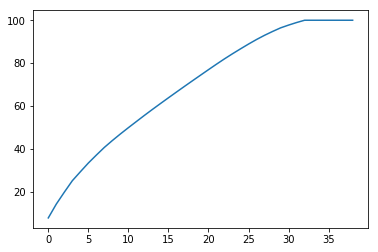

In [57]:
#lets see Cumulative Variance plot
plt.plot(var1)

#### From Cumulative Variance plot we can find that first 32 components are explaining nearly 100% variability of actual data.
#### So we will proceed with only 32 components for further modelling.

In [58]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

# 5. Model Training

In [59]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#### Implementing Logistic Regression(LR), Linear Discriminant Analysis(LDA), K-Nearest Neighbor(K-NN), Decision Tree(CART), Naive Bayes(NB) and Support Vector Machine(SVM).

In [60]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [61]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 0.891866 (0.004765)
LDA: 0.890456 (0.004324)
K-NN: 0.883350 (0.005325)
CART: 0.853932 (0.006231)
NB: 0.856669 (0.005032)


C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

SVM: 0.893304 (0.005050)


#### "Support Vector Machine" has highest Accuracy but it is taking more time compare to other algorithms for Training.
#### "Logistic Regression" is also has nearly same accuracy and it is very faster than SVM.

# 6. Model Selection

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

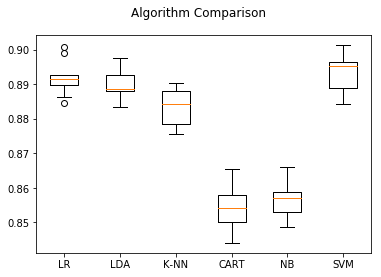

In [62]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#### According to Accuracy and Computation Time Logistic Regression seems the best model.

# 7. Making Prediction

In [63]:
#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [65]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\Users\RAHEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.8890854804821409
[[7824  203]
 [ 800  216]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      8027
         yes       0.52      0.21      0.30      1016

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.71      0.59      0.62      9043
weighted avg       0.86      0.89      0.87      9043



Exploratory data analysis will always be the main challanging part